<a href="https://colab.research.google.com/github/MinhNhata/BTVN_1_19146227_MinhNhat/blob/main/tinh_tien_TIP.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
pip install scikit-fuzzy

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 994.0/994.0 KB 14.8 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for scikit-fuzzy: filename=scikit_fuzzy-0.4.2-py3-none-any.whl size=894088 sha256=7fe91518541303f5e3f94d1f114208fc411512ade61d12ac988cfedcb5a5f3ab
  Stored in directory: /root/.cache/pip/wheels/2c/04/80/7eefb1a2de7d36aefd06432fab2a1486caf0a0596a7067391a
Successfully built scikit-fuzzy


26.53333333333334


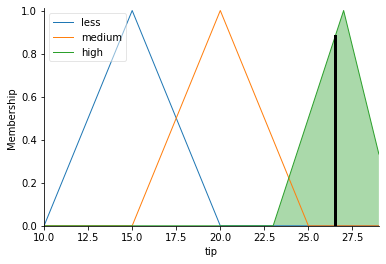

In [ ]:
import numpy as np
import skfuzzy as fuzz
from skfuzzy import control as ctrl

food = ctrl.Antecedent(np.arange(0, 11, 1), 'food')
service = ctrl.Antecedent(np.arange(0, 11, 1), 'service')
tip = ctrl.Consequent(np.arange(10, 30, 1), 'tip')

food['poor'] = fuzz.trimf(food.universe,[0,0,5])
food['average'] = fuzz.trimf(food.universe,[0,5,10])
food['good'] = fuzz.trimf(food.universe,[5,10,10])

service['poor'] = fuzz.trimf(food.universe,[0,0,5])
service['average'] = fuzz.trimf(food.universe,[0,5,10])
service['good'] = fuzz.trimf(food.universe,[5,10,10])


tip['less'] = fuzz.trimf(tip.universe,[10,15,20])
tip['medium'] = fuzz.trimf(tip.universe,[15,20,25])
tip['high'] = fuzz.trimf(tip.universe,[23,27,30])


rule1 = ctrl.Rule(food['poor'] & service['poor'], tip['less'])
rule2 = ctrl.Rule(food['poor'] & service['average'], tip['less'])
rule3 = ctrl.Rule(food['poor'] & service['good'], tip['medium'])

rule4 = ctrl.Rule(food['average'] & service['poor'], tip['less'])
rule5 = ctrl.Rule(food['average'] & service['average'], tip['medium'])
rule6 = ctrl.Rule(food['average'] & service['good'], tip['high'])

rule7 = ctrl.Rule(food['good'] & service['poor'], tip['medium'])
rule8 = ctrl.Rule(food['good'] & service['average'], tip['high'])
rule9 = ctrl.Rule(food['good'] & service['good'], tip['high'])


tipping_ctrl = ctrl.ControlSystem([rule1, rule2, rule3, rule4, rule5, rule6, rule7, rule8 , rule9 ])

tipping = ctrl.ControlSystemSimulation(tipping_ctrl)

tipping.input['food']=10
tipping.input['service']=10

tipping.compute()
print(tipping.output['tip']) 
tip.view(sim=tipping)



